In [1]:
!pip install SciExpeM-API 
!pip install SciExpeM-API --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 130 kB 9.6 MB/s 
     |████████████████████████████████| 7.9 MB 44.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from SciExpeM_API.SciExpeM import SciExpeM
import os 
my_sciexpem = SciExpeM(username='nikita.rozov', password='mdp2022_')

In [ ]:
result_list = my_sciexpem.filterDatabase(model_name='Experiment', fileDOI='tmp_39904519421883596702')

print(result_list)
for result in result_list:
    print(result.__dict__)
    print("DOI:", result.fileDOI)
    print("Reactor:", result.reactor)
    print('Data columns', result._data_columns)
    for data in result._data_columns:
      print(data.__dict__)
    

[]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_excel("/content/drive/My Drive/MDP/report/POLIMI_1212_C1C3.xlsx")
for filename in os.listdir("/content/drive/My Drive/MDP/report/"):
  if filename != "POLIMI_1212_C1C3.xlsx":
    inter_data = pd.read_excel("/content/drive/My Drive/MDP/report/"+filename)
    data = pd.concat([data, inter_data], ignore_index=True)
data = data.drop(columns=["Unnamed: 0"])
data = data.sort_values(by=['Error'])[20:840]
print(data.shape)

(820, 18)


In [ ]:
global max_value, min_value
def normalize(values):
  return (values - values.min())/(values.max() - values.min())



In [ ]:
x = data.drop(columns=['Experiment DOI','Exp SciExpeM ID','Chem Model','Error','d0L2','d1L2','d0Pe','d1Pe','shift'])
x_exp_type = pd.get_dummies(x['Experiment Type'], prefix='Experiment Type')
# dx = x.set_index('id').join(x_exp_type.set_index('image_id'))
y = data['Error']
norm_y = normalize(y)
# x.head()

In [ ]:
def splitter(x, num):
  first, second = x.replace('(','').replace(')','').split(", ")
  if num == 1:
    return first
  else:    
    return second
x['Phi1'] = x.Phi.apply(splitter,num = 1)
x['Pressure1'] = x['Pressure (Bar)'].apply(splitter,num = 1)
x['Temperature1'] = x["Temperature (K)"].apply(splitter,num = 1)
x['Phi2'] = x.Phi.apply(splitter,num = 2)
x['Pressure2'] = x['Pressure (Bar)'].apply(splitter,num = 2)
x['Temperature2'] = x["Temperature (K)"].apply(splitter,num = 2)
x = x.drop(columns=['Phi','Pressure (Bar)','Temperature (K)'])

x.head()

,Chem Model ID,Experiment Type,Reactor,Target,Fuels,Score,Phi1,Pressure1,Temperature1,Phi2,Pressure2,Temperature2
256,31.0,ignition delay measurement,shock tube,tau_P(slope),['CH4'],0.297652,2.0,2.691,1426.3,2.0,3.12,1653.6
471,4.0,outlet concentration measurement,shock tube,C2H2_x,['C6H6'],0.768225,0.0,30.398,1200.0,100.0,30.398,2000.0
127,24.0,jet stirred reactor measurement,stirred reactor,CH4_x,['C7H8'],0.879847,0.5,1.0,1000.0,0.5,1.0,1300.0
305,12.0,jet stirred reactor measurement,stirred reactor,C4H4_x,['C7H8'],0.909856,0.5,1.0,1000.0,0.5,1.0,1300.0
199,14.0,jet stirred reactor measurement,stirred reactor,C3H4-P_x,['C7H8'],0.853019,1.0,10.0,945.0,1.0,10.0,1203.0


In [ ]:
x_fuels = pd.get_dummies(x['Fuels'], prefix='Fuels:')
#model id to categorical
x_model_id = pd.get_dummies(x['Chem Model ID'], prefix='Model ID:')
x_reactor = pd.get_dummies(x['Reactor'], prefix='Reactor:')
x_exp_type = pd.get_dummies(x['Experiment Type'], prefix='ExpType:')
x_target = pd.get_dummies(x['Target'], prefix='Target:')
x = x.drop(columns=["Fuels",'Target','Experiment Type','Reactor','Chem Model ID'])
x.join(x_target).join(x_exp_type).join(x_reactor).join(x_fuels).join(x_model_id)

,Score,Phi1,Pressure1,Temperature1,Phi2,Pressure2,Temperature2,Target:_AR_x,Target:_BIPHENYL_x,Target:_C10H8_x,...,Model ID:_11.0,Model ID:_12.0,Model ID:_14.0,Model ID:_15.0,Model ID:_17.0,Model ID:_23.0,Model ID:_24.0,Model ID:_31.0,Model ID:_32.0,Model ID:_33.0
256,0.297652,2.0,2.691,1426.3,2.0,3.12,1653.6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
471,0.768225,0.0,30.398,1200.0,100.0,30.398,2000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0.879847,0.5,1.0,1000.0,0.5,1.0,1300.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
305,0.909856,0.5,1.0,1000.0,0.5,1.0,1300.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
199,0.853019,1.0,10.0,945.0,1.0,10.0,1203.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.757903,0.0,16.0,1049.0,0.0,16.0,1209.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0.488517,100.0,1.0,1100.0,100.0,1.0,1500.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
66,0.508468,100.0,1.0,1100.0,100.0,1.0,1500.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
221,0.537750,0.5,0.329,1875.56,0.5,0.329,2107.01,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x, test_size=0.2)
y_train, y_test = train_test_split(norm_y, test_size=0.2)
clfLin = LinearRegression()
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)
clfLin.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = clf.predict(x_test)
predictionsLin = clfLin.predict(x_test)
from sklearn import metrics
print(metrics.r2_score(y_test,predictions))
print(metrics.explained_variance_score(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))

-0.005472488828780486
-0.0018881121204750162
0.050982859663164355


In [ ]:
print(metrics.r2_score(y_test,predictionsLin))
print(metrics.explained_variance_score(y_test,predictionsLin))
print(metrics.mean_squared_error(y_test,predictionsLin))

-0.005508865278422759
-0.0019254410741411654
0.05098470414468698


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)
print(metrics.r2_score(y_test,predictions))
print(metrics.explained_variance_score(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))

-0.04659765616284828
-0.039225687273408916
0.05306812669743123


Try with k-fold 

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

lm = LinearRegression()
#688 - the amount of train set
folds = KFold(n_splits = 200, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
print(scores)

Discovering corelations in collected data

In [4]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/MDP/Collected_data/csv_fileCRECK_2100_PAH_2110_AN.csv")
for filename in os.listdir("/content/drive/My Drive/MDP/Collected_data/"):
    if filename != "csv_fileCRECK_2100_PAH_2110_AN":
      print(filename)
      inter_data = pd.read_csv("/content/drive/My Drive/MDP/Collected_data/"+filename)
      data = pd.concat([data, inter_data], ignore_index=True)
data.head()

csv_filePOLIMI_1212_C1C3.csv
csv_fileCRECK_2003_C1C3_DME_LTHT.csv
csv_filePOLIMI_1407_PAH_RF_HT.csv
csv_fileCRECK_2100_PAH_2110_AN.csv


,chemModel.id,experiment.id,experiment.fuels,experiment.ignition_type,experiment.reactor,file_paper.author,file_paper.description,file_paper.year,uncertainty_0,uncertainty_1,uncertainty_2,error
0,24,201,"[""H2""]",OH-d/dt max,shock tube,"Mathieu, Olivier; Deguillaume, Fiona; Petersen...","Mathieu, Olivier; Deguillaume, Fiona; Petersen...",2014,0.000000,1.000000,1.000000,3.330669e-16
1,24,201,"[""H2""]",OH-d/dt max,shock tube,"Mathieu, Olivier; Deguillaume, Fiona; Petersen...","Mathieu, Olivier; Deguillaume, Fiona; Petersen...",2014,0.016139,0.945155,0.554368,6.228670e-02
2,24,201,"[""H2""]",OH-d/dt max,shock tube,"Mathieu, Olivier; Deguillaume, Fiona; Petersen...","Mathieu, Olivier; Deguillaume, Fiona; Petersen...",2014,0.041021,0.710957,0.937880,8.682599e-03
3,24,201,"[""H2""]",OH-d/dt max,shock tube,"Mathieu, Olivier; Deguillaume, Fiona; Petersen...","Mathieu, Olivier; Deguillaume, Fiona; Petersen...",2014,0.089768,0.563876,0.057575,1.317242e-01
4,24,201,"[""H2""]",OH-d/dt max,shock tube,"Mathieu, Olivier; Deguillaume, Fiona; Petersen...","Mathieu, Olivier; Deguillaume, Fiona; Petersen...",2014,0.106110,0.439859,0.629690,5.175883e-02


In [6]:
authors = data["file_paper.author"].unique()
years = data["file_paper.year"].unique()
models = data["chemModel.id"].unique()

In [ ]:
data.corr()

,chemModel.id,experiment.id,file_paper.year,uncertainty_0,uncertainty_1,uncertainty_2,error
chemModel.id,1.000000,0.004246,0.002880,-0.000226,-0.000426,-0.018860,0.096215
experiment.id,0.004246,1.000000,0.346965,-0.122378,0.094576,-0.057194,0.044230
file_paper.year,0.002880,0.346965,1.000000,-0.034735,0.090789,-0.045761,0.002687
uncertainty_0,-0.000226,-0.122378,-0.034735,1.000000,-0.781479,0.471747,-0.118557
uncertainty_1,-0.000426,0.094576,0.090789,-0.781479,1.000000,-0.260961,0.231664
uncertainty_2,-0.018860,-0.057194,-0.045761,0.471747,-0.260961,1.000000,-0.332089
error,0.096215,0.044230,0.002687,-0.118557,0.231664,-0.332089,1.000000


In [ ]:
for author in authors:
  print(data[data["file_paper.author"]==author].describe())

In [ ]:
for year in years:
  print(data[data["file_paper.year"]==year].describe())

In [ ]:
for model in models:
  print(data[data["chemModel.id"]==model].describe())

In [7]:
authors

array(['Mathieu, Olivier; Deguillaume, Fiona; Petersen, Eric L.',
       'Hu, Erjiang; Pan, Lun; Gao, Zhenhua; Lu, Xin; Meng, Xin; Huang, Zuohua',
       'Shao, Jiankun, 0000-0002-2156-7589; Choudhary, Rishav, 0000-0003-3480-7200; Davidson, David F., 0000-0002-4470-0135; Hanson, Ronald K.; Barak, Samuel; Vasu, Subith, 0000-0002-4164-3163',
       'Bhaskaran, K.A.; Gupta, M.C.; Just, Th.',
       'Petersen, Eric; Kalitan, Danielle; Rickard, Matthew',
       'Zhang, Yingjia; Huang, Zuohua; Wei, Liangjie; Zhang, Jiaxiang; Law, Chung K.',
       'Skinner, Gordon B.; Ringrose, Gordon H.', 'Slack, M.W.',
       'Pan, Lun; Zhang, Yingjia; Zhang, Jiaxiang; Tian, Zemin; Huang, Zuohua',
       'Tang, Chenglong; Man, Xingjia; Wei, Liangjie; Pan, Lun; Huang, Zuohua',
       'Pan, Lun; Hu, Erjiang, 0000-0002-0762-9018; Zhang, Jiaxiang; Zhang, Zihang; Huang, Zuohua',
       'Heng, Yijun; Li, Gesheng; Liang, Junjie; Zhang, Zunhua, 0000-0003-4445-180X'],
      dtype=object)

In [16]:
pd.merge(data.groupby('file_paper.author')['error'].mean(), data.groupby('file_paper.author')['error'].std(), on="file_paper.author").head()

,error_x,error_y
file_paper.author,,
"Bhaskaran, K.A.; Gupta, M.C.; Just, Th.",0.040874,0.076390
"Heng, Yijun; Li, Gesheng; Liang, Junjie; Zhang, Zunhua, 0000-0003-4445-180X",0.012139,0.065383
"Hu, Erjiang; Pan, Lun; Gao, Zhenhua; Lu, Xin; Meng, Xin; Huang, Zuohua",0.037265,0.133341
"Mathieu, Olivier; Deguillaume, Fiona; Petersen, Eric L.",0.065884,0.102815
"Pan, Lun; Hu, Erjiang, 0000-0002-0762-9018; Zhang, Jiaxiang; Zhang, Zihang; Huang, Zuohua",0.044595,0.119327


Error mean and std errors for authors, year and model

In [ ]:
pd.merge(data.groupby('file_paper.author')['error'].mean(), data.groupby('file_paper.author')['error'].std(), on="file_paper.author").rename(columns={"error_x": "mean", "error_y": "std"}).plot.bar()

In [ ]:
pd.merge(data.groupby('file_paper.year')['error'].mean(), data.groupby('file_paper.year')['error'].std(), on="file_paper.year").rename(columns={"error_x": "mean", "error_y": "std"}).plot.bar()

In [ ]:
pd.merge(data.groupby('file_paper.model')['error'].mean(), data.groupby('file_paper.model')['error'].std(), on="file_paper.model").rename(columns={"error_x": "mean", "error_y": "std"}).plot.bar()

Uncertainty mean and std errors for authors, year and model

In [ ]:
pd.merge(data.groupby('file_paper.author')['uncertainty_0'].mean(), data.groupby('file_paper.author')['uncertainty_0'].std(), on="file_paper.author").rename(columns={"uncertainty_0_x": "mean", "uncertainty_0_y": "std"}).plot.bar()

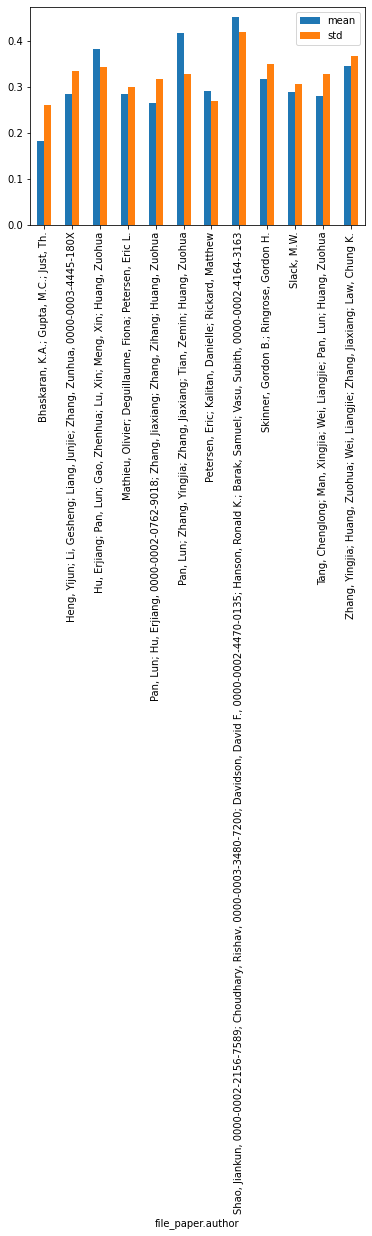

In [20]:
pd.merge(data.groupby('file_paper.year')['uncertainty_1'].mean(), data.groupby('file_paper.year')['uncertainty_1'].std(), on="file_paper.year").rename(columns={"uncertainty_1_x": "mean", "uncertainty_1_y": "std"}).plot.bar()

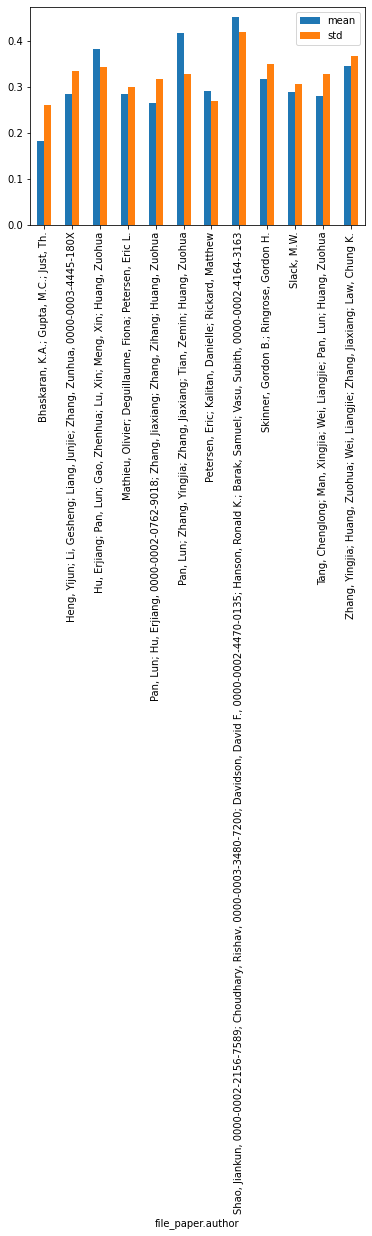

In [21]:
pd.merge(data.groupby('file_paper.author')['uncertainty_1'].mean(), data.groupby('file_paper.author')['uncertainty_1'].std(), on="file_paper.author").rename(columns={"uncertainty_1_x": "mean", "uncertainty_1_y": "std"}).plot.bar()

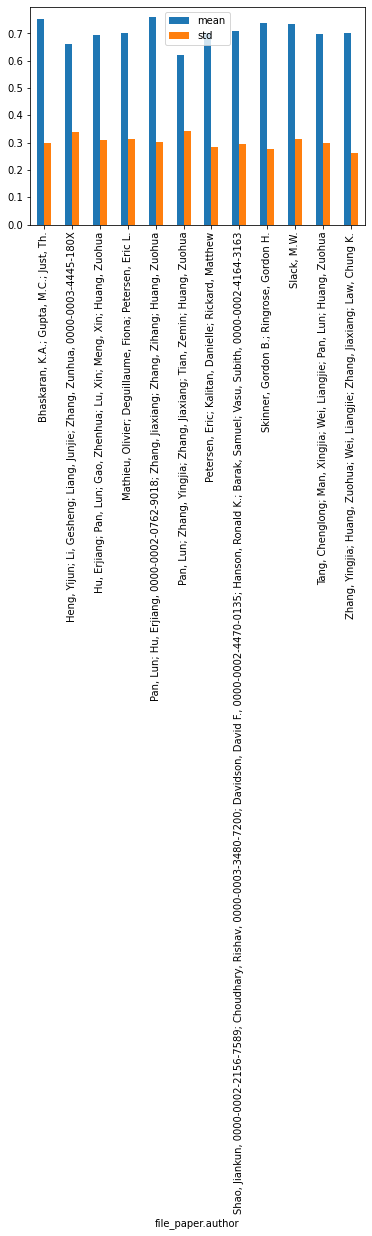

In [22]:
pd.merge(data.groupby('file_paper.author')['uncertainty_2'].mean(), data.groupby('file_paper.author')['uncertainty_2'].std(), on="file_paper.author").rename(columns={"uncertainty_2_x": "mean", "uncertainty_2_y": "std"}).plot.bar()